In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv("AutoData (1).csv")

In [3]:
dataset.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
make                205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [5]:
dataset.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [6]:
#wheelbase, carlength, carwidth, carheight, curbweight,enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, 
#symboling, make, fueltype,aspiration, doornumber, carbody, drivewheel,enginelocation, enginetype, cylindernumber, fuelsystem,
dataset['highwaympg'].value_counts()

25    19
24    17
38    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
31     8
22     8
23     7
27     5
43     4
41     3
42     3
26     3
20     2
19     2
18     2
16     2
36     2
39     2
46     2
47     2
53     1
50     1
17     1
54     1
Name: highwaympg, dtype: int64

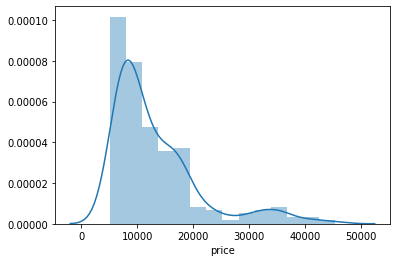

In [7]:
sns.distplot(dataset['price'])

In [8]:
# numerical = wheelbase,'carlength', 'carwidth','carheight', 'curbweight', enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm,'citympg', 'highwaympg', 'price'   

In [9]:
data=dataset.copy()

In [10]:
def first(x):
    x=list(x.split())[0]
    return x

In [11]:
data['make']=data['make'].apply(first)

In [12]:
data['make'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
renault         2
maxda           2
Nissan          1
porcshce        1
vokswagen       1
mercury         1
toyouta         1
Name: make, dtype: int64

In [13]:
def func(x):
    if x=='vw':
        return 'volkswagen'
    elif x=='maxda':
        return 'mazda'
    elif x=='Nissan':
        return 'nissan'
    elif x=='vokswagen':
        return 'volkswagen'
    elif x=='porcshce':
        return 'porsche'
    elif x=='toyouta':
        return 'toyota'
    
    else:
        return x

In [14]:
data['make']=data['make'].apply(func)

In [15]:
data_cleaned=data.copy()

In [16]:
#fueltype, aspiration, enginelocation
fueltype=pd.get_dummies(data_cleaned['fueltype'],drop_first=True)
aspiration=pd.get_dummies(data_cleaned['aspiration'],drop_first=True)
enginelocation=pd.get_dummies(data_cleaned['enginelocation'],drop_first=True)
data_cleaned.drop(['fueltype','aspiration','enginelocation'],axis=1,inplace=True)
data_cleaned=pd.concat([data_cleaned,fueltype,aspiration,enginelocation],axis=1)

In [17]:
data_cleaned.columns

Index(['symboling', 'make', 'doornumber', 'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'gas', 'turbo', 'rear'],
      dtype='object')

In [18]:
data_cleaned.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,rear
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,0.194311,-0.059866,0.212471
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.308346,0.257611,-0.187790
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,-0.212679,0.234539,-0.050989
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.233880,0.300567,-0.051698
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,-0.284631,0.087311,-0.106234
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.217275,0.324902,0.050468
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.069594,0.108217,0.196826
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173,-0.054451,0.212614,0.185042
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.241829,0.222982,-0.138455
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984,-0.984356,0.295541,-0.019762


In [19]:
# wheelbase, carlength, car width,enginesize,horse power,highwaympg, curbweight and enginesize having highest correlation with price .
# carheight, stroke, compression ratio, peakrpm, gas, turbo, rear  having less correlation with price column.


In [20]:
#wheelbase, carlength, car width,enginesize,horse power,highwaympg, curbweight,carheight, stroke, compression ratio, peakrpm 


In [21]:
data1=data_cleaned.copy()

In [22]:
data1.columns

Index(['symboling', 'make', 'doornumber', 'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'gas', 'turbo', 'rear'],
      dtype='object')

In [23]:
#symboling, make, fueltype,aspiration, doornumber, carbody, drivewheel,enginelocation, enginetype, cylindernumber, fuelsystem,

In [24]:
X=data1['price'].groupby(data1['symboling']).mean()

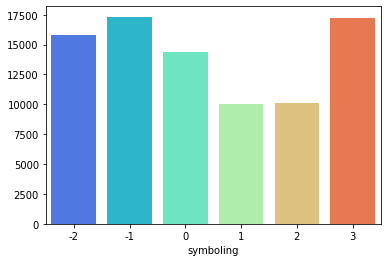

In [25]:
sns.barplot(X.keys(),X.values,palette='rainbow')

In [26]:
dataset['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

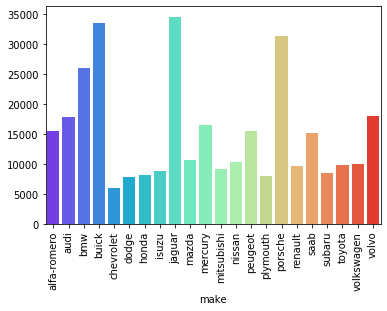

In [27]:
X=data1['price'].groupby(data1['make']).mean()
sns.barplot(X.keys(),X.values,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

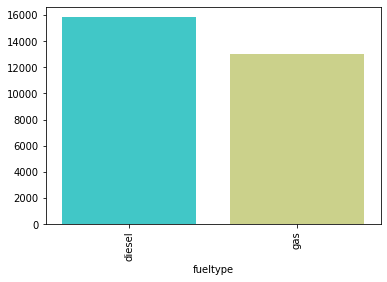

In [28]:
X=dataset['price'].groupby(dataset['fueltype']).mean()
sns.barplot(X.keys(),X.values,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

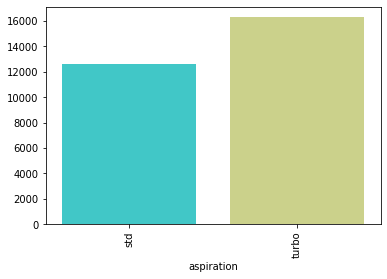

In [29]:
X=dataset['price'].groupby(dataset['aspiration']).mean()
sns.barplot(X.keys(),X.values,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

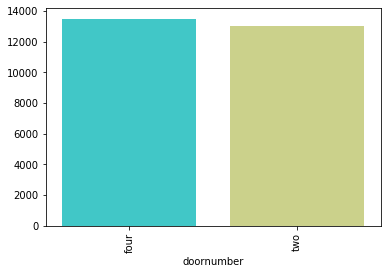

In [30]:
X=dataset['price'].groupby(dataset['doornumber']).mean()
sns.barplot(X.keys(),X.values,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [31]:
data1.drop(['doornumber'],axis=1,inplace=True)

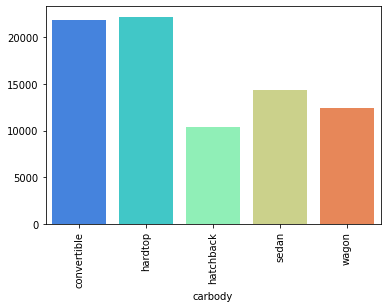

In [32]:
X=data1['price'].groupby(data1['carbody']).mean()
sns.barplot(X.keys(),X.values,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

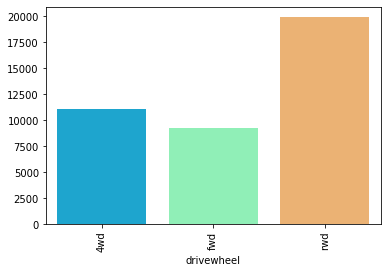

In [33]:
X=data1['price'].groupby(data1['drivewheel']).mean()
sns.barplot(X.keys(),X.values,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

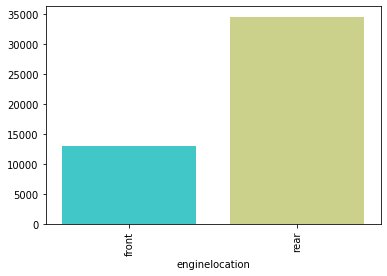

In [35]:
X=dataset['price'].groupby(dataset['enginelocation']).mean()
sns.barplot(X.keys(),X.values,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

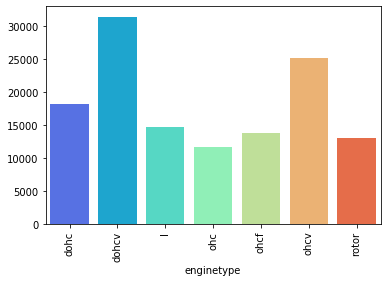

In [36]:
X=data1['price'].groupby(data1['enginetype']).mean()
sns.barplot(X.keys(),X.values,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

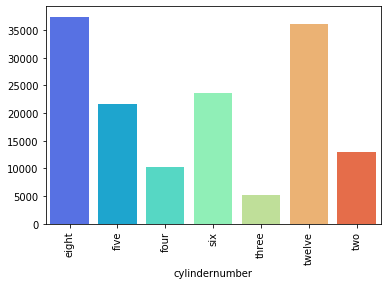

In [37]:
X=data1['price'].groupby(data1['cylindernumber']).mean()
sns.barplot(X.keys(),X.values,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

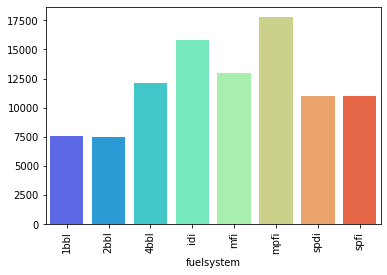

In [38]:
X=data1['price'].groupby(data1['fuelsystem']).mean()
sns.barplot(X.keys(),X.values,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [39]:
data1.columns

Index(['symboling', 'make', 'carbody', 'drivewheel', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'gas',
       'turbo', 'rear'],
      dtype='object')

In [40]:
data1.head()

,symboling,make,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,rear
0,3,alfa-romero,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,...,2.68,9.0,111,5000,21,27,13495.0,1,0,0
1,3,alfa-romero,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,...,2.68,9.0,111,5000,21,27,16500.0,1,0,0
2,1,alfa-romero,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,...,3.47,9.0,154,5000,19,26,16500.0,1,0,0
3,2,audi,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,...,3.40,10.0,102,5500,24,30,13950.0,1,0,0
4,2,audi,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,...,3.40,8.0,115,5500,18,22,17450.0,1,0,0


In [41]:
data1.drop(['wheelbase','carlength','carwidth','horsepower','highwaympg','curbweight','carheight','stroke','compressionratio','peakrpm','gas','turbo','rear'],axis=1,inplace=True)

In [42]:
data1.columns

Index(['symboling', 'make', 'carbody', 'drivewheel', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'citympg',
       'price'],
      dtype='object')

In [43]:
a=['symboling', 'make', 'carbody',
       'drivewheel',  'enginetype', 'cylindernumber',
       'fuelsystem']
#fueltype, aspiration, enginelocation

In [44]:
data1['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [45]:
symboling=pd.get_dummies(data1['symboling'],drop_first=True)
make=pd.get_dummies(data1['make'],drop_first=True)
carbody=pd.get_dummies(data1['carbody'],drop_first=True)
drivewheel=pd.get_dummies(data1['drivewheel'],drop_first=True)
enginetype=pd.get_dummies(data1['enginetype'],drop_first=True)
cylindernumber=pd.get_dummies(data1['cylindernumber'],drop_first=True)
fuelsystem=pd.get_dummies(data1['fuelsystem'],drop_first=True)
data1.drop(['symboling','make','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'],axis=1,inplace=True)

In [46]:
data2=pd.concat([data1,symboling,make,carbody,drivewheel,enginetype,cylindernumber,fuelsystem],axis=1)
# removing drive wheel,carbody,aspiration  increasing accuracy, removing engine location,fuel type not affecting accuracy of our model
#

In [47]:
Y=data2['price']
X=data2.drop('price',axis=1)

In [48]:
import statsmodels.api as sm
X=sm.add_constant(X)
results=sm.OLS(Y,X).fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     51.65
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           2.05e-74
Time:                        18:54:54   Log-Likelihood:                -1832.5
No. Observations:                 205   AIC:                             3771.
Df Residuals:                     152   BIC:                             3947.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9266.7369   6278.287      1.476      0.142   -3137.238    2.17e+04
enginesize   128.7998     22.721      5.669      0.000      83.911     173.689
boreratio  -3832.2847   2106.416     -1.819      0.071   -7993.919     329.350
citympg     -110.4129     69.788     -1.582      0.116    -248.293      27.467
-1          2483.6170   1483.391      1.674      0.096    -447.110    5414.344
0           3016.5486   1686.954      1.788      0.076    -316.356    6349.454
1           2719.5139   1713.397      1.587      0.115    -665.634    6104.662
2           1314.3121   1787.442      0.735      0.463   -2217.126    4845.750
3           1461.5265   1865.855      0.783      0.435   -2224.832    5147.885
audi        6519.2355   2568.990      2.538      0.012    1443.699    1.16e+04
bmw         9576.6152   2461.351      3.891      0.000    4713.738    1.44e+04
buick       1.049e+04   2729.173      3.843      0.000    5095.082    1.59e+04
chevrolet    773.0635   2402.754      0.322      0.748   -3974.042    5520.169
dodge        -94.6800   1902.018     -0.050      0.960   -3852.485    3663.124
honda       2037.0651   2338.593      0.871      0.385   -2583.279    6657.409
isuzu       1100.9773   2200.778      0.500      0.618   -3247.086    5449.041
jaguar      4648.6444   2692.084      1.727      0.086    -670.089    9967.378
mazda        880.2389   1901.671      0.463      0.644   -2876.881    4637.359
mercury     3684.4337   3059.699      1.204      0.230   -2360.595    9729.463
mitsubishi   -44.4540   1978.676     -0.022      0.982   -3953.712    3864.804
nissan       354.9701   1830.830      0.194      0.847   -3262.190    3972.130
peugeot     -693.5191   1874.170     -0.370      0.712   -4396.305    3009.267
plymouth    -427.1785   1931.701     -0.221      0.825   -4243.629    3389.272
porsche     9653.7891   3142.178      3.072      0.003    3445.807    1.59e+04
renault    -1191.0379   2514.043     -0.474      0.636   -6158.017    3775.941
saab        5365.8583   2150.156      2.496      0.014    1117.808    9613.908
subaru     -4952.7383   3675.482     -1.348      0.180   -1.22e+04    2308.889
toyota      -250.8486   1765.024     -0.142      0.887   -3737.995    3236.298
volkswagen  1593.4874   1981.511      0.804      0.423   -2321.373    5508.347
volvo       6065.8939   2225.206      2.726      0.007    1669.567    1.05e+04
hardtop    -3320.3460   1385.164     -2.397      0.018   -6057.007    -583.685
hatchback  -2949.4669   1260.097     -2.341      0.021   -5439.033    -459.901
sedan      -2936.0389   1311.342     -2.239      0.027   -5526.850    -345.228
wagon      -3448.7931   1397.703     -2.467      0.015   -6210.225    -687.361
fwd         -811.4972    922.084     -0.880      0.380   -2633.253    1010.258
rwd          171.5660   1205.898      0.142      0.887   -2210.920    2554.052
do

In [49]:
data2.drop(['citympg'],axis=1,inplace=True)

In [50]:
#for i in range(len(a)):
#    b=pd.get_dummies(data1[a[i]],drop_first=True)
#    data1.drop(a[i],axis=1,inplace=True)
#    data1=pd.concat([data,b],axis=1)

In [51]:
x=data2['enginesize']
y=data2['price']
x=x.values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)

from sklearn.metrics import r2_score
r2=r2_score(Y_pred,Y_test)
print(r2_score(Y_pred,Y_test))

import sklearn.metrics as metrics
print(metrics.mean_absolute_error(Y_test,Y_pred))
print(metrics.mean_squared_error(Y_test,Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Adj_R2=(1-((1-r2)*(205-1))/(203))
print(Adj_R2)

0.7338146014506948
2748.694703290109
15465458.965908466
3932.6147746643665
0.7325033433297623


In [52]:
Y=data2['price']
X=data2.drop('price',axis=1)

In [53]:
import statsmodels.api as sm
X=sm.add_constant(X)
results=sm.OLS(Y,X).fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     52.10
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           9.55e-75
Time:                        18:54:57   Log-Likelihood:                -1834.1
No. Observations:                 205   AIC:                             3772.
Df Residuals:                     153   BIC:                             3945.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3690.4488   5221.062      0.707      0.481   -6624.231     1.4e+04
enginesize   134.0442     22.588      5.934      0.000      89.420     178.668
boreratio  -3365.0451   2095.831     -1.606      0.110   -7505.548     775.458
-1          2533.3134   1490.326      1.700      0.091    -410.960    5477.587
0           2980.3338   1695.064      1.758      0.081    -368.419    6329.086
1           2543.1747   1718.146      1.480      0.141    -851.178    5937.527
2            938.9738   1780.310      0.527      0.599   -2578.188    4456.136
3           1329.9805   1873.135      0.710      0.479   -2370.567    5030.528
audi        6991.1726   2564.116      2.727      0.007    1925.530    1.21e+04
bmw         9367.7435   2469.852      3.793      0.000    4488.328    1.42e+04
buick       1.057e+04   2742.041      3.855      0.000    5152.850     1.6e+04
chevrolet   -157.4057   2341.082     -0.067      0.946   -4782.424    4467.613
dodge        -86.2744   1911.330     -0.045      0.964   -3862.280    3689.731
honda       2336.0612   2342.366      0.997      0.320   -2291.495    6963.617
isuzu        462.2191   2174.029      0.213      0.832   -3832.771    4757.210
jaguar      4224.9400   2691.856      1.570      0.119   -1093.064    9542.944
mazda        831.0876   1910.734      0.435      0.664   -2943.741    4605.916
mercury     3806.2653   3073.718      1.238      0.217   -2266.142    9878.673
mitsubishi    12.5768   1988.042      0.006      0.995   -3914.979    3940.133
nissan       139.3540   1834.697      0.076      0.940   -3485.255    3763.963
peugeot     -602.1789   1882.460     -0.320      0.749   -4321.148    3116.790
plymouth    -572.0041   1938.986     -0.295      0.768   -4402.646    3258.638
porsche     9598.3801   3157.379      3.040      0.003    3360.693    1.58e+04
renault     -990.1808   2523.138     -0.392      0.695   -5974.869    3994.507
saab        6021.2086   2120.218      2.840      0.005    1832.527    1.02e+04
subaru     -4902.1718   3693.352     -1.327      0.186   -1.22e+04    2394.379
toyota      -511.5008   1765.929     -0.290      0.772   -4000.253    2977.252
volkswagen  1816.2418   1986.188      0.914      0.362   -2107.652    5740.136
volvo       5773.6700   2228.393      2.591      0.010    1371.277    1.02e+04
hardtop    -3318.3960   1391.951     -2.384      0.018   -6068.321    -568.471
hatchback  -3045.5501   1264.800     -2.408      0.017   -5544.277    -546.823
sedan      -3013.1312   1316.858     -2.288      0.023   -5614.703    -411.560
wagon      -3482.1345   1404.392     -2.479      0.014   -6256.637    -707.632
fwd        -1151.6667    901.060     -1.278      0.203   -2931.791     628.458
rwd          162.5346   1211.794      0.134      0.893   -2231.473    2556.543
dohcv       1504.1370   4391.485      0.343      0.732   -7171.638    1.02e+04
l 

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
Y_pred=model.predict(X_test)

In [58]:
from sklearn.metrics import r2_score
r2=r2_score(Y_pred,Y_test)
print(r2_score(Y_pred,Y_test))

0.8845421176723858


In [59]:
import sklearn.metrics as metrics
print(metrics.mean_absolute_error(Y_test,Y_pred))
print(metrics.mean_squared_error(Y_test,Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

2068.8716207079315
8432634.497682711
2903.8998773516128


In [60]:
205-53-1


151

In [61]:
Adj_R2=(1-((1-r2)*(205-1))/(151))

In [62]:
Adj_R2

0.8440171655971305

In [63]:
r2

0.8845421176723858